In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
Titles_Relabeled_3 = pd.read_csv('Titles_English_Relabeled_3.csv')

In [3]:
Titles_Relabeled_3 = Titles_Relabeled_3.drop('Unnamed: 0', axis=1)
Titles_Relabeled_3['EAN'] = Titles_Relabeled_3['EAN'].astype(str)

In [4]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1000, ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(Titles_Relabeled_3['Annotation Text']).toarray()
labels = Titles_Relabeled_3.Category
features.shape

(300359, 3830)

In [5]:
Titles_train, Titles_test = train_test_split(Titles_Relabeled_3, random_state=42)

In [6]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MaxAbsScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42)

# Initialize the MaxAbsScaler
scaler = MaxAbsScaler()

# Fit on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Just transform the test data
X_test_scaled = scaler.transform(X_test)

# Train the RandomForestClassifier model on the scaled data
rf_classifier = RandomForestClassifier(class_weight = 'balanced', random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Get the predicted labels and probabilities on the scaled test data
y_pred = rf_classifier.predict(X_test_scaled)
y_pred_proba = rf_classifier.predict_proba(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy*100:.2f}%')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 score: {f1:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

Model accuracy: 79.27%
F1 score: 0.81
Recall: 0.77


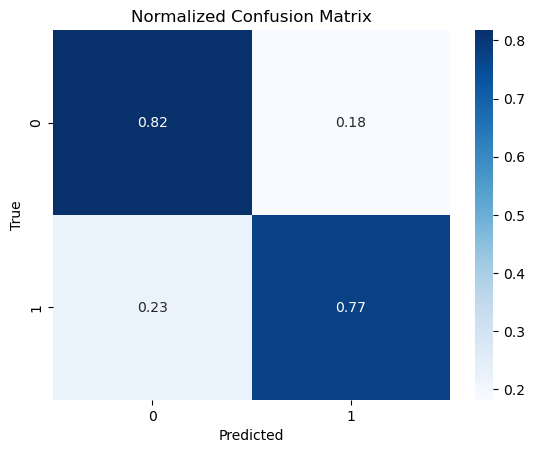

In [7]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_normalized, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

In [22]:
import plotly.graph_objects as go

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define the labels for the x-axis and y-axis
labels = sorted(set(y_test))

# Create the Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    z=cm_normalized,
    x=labels,
    y=labels,
    colorscale='Blues',
    colorbar=dict(title='Normalized Count'),
))

# Customize the layout
fig.update_layout(
    title='Normalized Confusion Matrix',
    xaxis=dict(title='Predicted', tickangle=-45),
    yaxis=dict(title='True', tickangle=0),
)

# Show the Plotly confusion matrix
fig.show()
# Export the plot as an HTML file
fig.write_html("random_classifier_confmat.html")

In [8]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=Titles_Relabeled_3['Category'].astype('str').unique()))

              precision    recall  f1-score   support

           1       0.73      0.82      0.77     31889
           0       0.85      0.77      0.81     43201

    accuracy                           0.79     75090
   macro avg       0.79      0.80      0.79     75090
weighted avg       0.80      0.79      0.79     75090



In [9]:
# Create a dataframe with the predicted labels and maximum probabilities (confidence scores)
#results_df = pd.DataFrame({
#    'Predicted Category': y_pred,
#    'Confidence Score': np.max(y_pred_proba, axis=1)
#}, index=Titles_test.index)  # use the same indices as in Titles_test

# Add the 'Annotation Text' column to the results
#results_df = Titles_test[['EAN', 'Title', 'Annotation Text', 'MJR BISAC']].join(results_df)

# Print the results
#print(results_df)

In [15]:
import plotly.graph_objects as go

# Get feature importances
importances = rf_classifier.feature_importances_

# Get feature names from the TfidfVectorizer
feature_names = tfidf.get_feature_names_out()

# Sort indices in descending order of feature importance
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Create a scatter plot of feature importances
fig = go.Figure(data=go.Scatter(
    x=sorted_feature_names,
    y=importances[indices],
    mode='markers',
    marker=dict(
        size=10,
        color=importances[indices],
        colorscale='Viridis',
        showscale=True
    )
))

# Customize the layout
fig.update_layout(
    title="Feature Importances",
    xaxis=dict(title="Features"),
    yaxis=dict(title="Importance"),
)

# Export the plot as an HTML file
fig.write_html("feature_importances.html")